# Imports

In [274]:

import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
plotting.setup_mpl()
ff1.Cache.enable_cache('../cache/')
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import requests
import re
pio.templates.default = "plotly_dark"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_rows = 75
pd.options.display.max_columns = 99

In [275]:
year = 2022
gp_round = 4
ses = 'Sprint'

In [276]:
driver_1 = 'VER'
driver_2 = 'LEC'
team_1 = 'Red Bull'
team_2 = 'Ferrari'

In [277]:
events_list = ff1.get_event_schedule(2022)[2:]

session = ff1.get_session(year, gp_round, ses)
session.load(weather=True, telemetry=True)

core           INFO 	Loading data for Emilia Romagna Grand Prix - Sprint [v2.2.8]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching 

In [278]:
events_list

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport
2,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022,2022-03-20 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2022-03-18 15:00:00,Practice 2,2022-03-18 18:00:00,Practice 3,2022-03-19 15:00:00,Qualifying,2022-03-19 18:00:00,Race,2022-03-20 18:00:00,True
3,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022,2022-03-27 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2022-03-25 17:00:00,Practice 2,2022-03-25 20:00:00,Practice 3,2022-03-26 17:00:00,Qualifying,2022-03-26 20:00:00,Race,2022-03-27 20:00:00,True
4,3,Australia,Melbourne,FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022,2022-04-10 17:00:00,Australian Grand Prix,conventional,Practice 1,2022-04-08 13:00:00,Practice 2,2022-04-08 16:00:00,Practice 3,2022-04-09 13:00:00,Qualifying,2022-04-09 16:00:00,Race,2022-04-10 15:00:00,True
5,4,Italy,Imola,FORMULA 1 ROLEX GRAN PREMIO DEL MADE IN ITALY E DELL'EMILIA-ROMAGNA 2022,2022-04-24 17:00:00,Emilia Romagna Grand Prix,sprint,Practice 1,2022-04-22 13:30:00,Qualifying,2022-04-22 17:00:00,Practice 2,2022-04-23 12:30:00,Sprint,2022-04-23 16:30:00,Race,2022-04-24 15:00:00,True
6,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2022,2022-05-08 17:30:00,Miami Grand Prix,conventional,Practice 1,2022-05-06 14:30:00,Practice 2,2022-05-06 17:30:00,Practice 3,2022-05-07 13:00:00,Qualifying,2022-05-07 16:00:00,Race,2022-05-08 15:30:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,18,Japan,Suzuka,FORMULA 1 JAPANESE GRAND PRIX 2022,2022-10-09 16:00:00,Japanese Grand Prix,conventional,Practice 1,2022-10-07 13:00:00,Practice 2,2022-10-07 16:00:00,Practice 3,2022-10-08 13:00:00,Qualifying,2022-10-08 16:00:00,Race,2022-10-09 14:00:00,True
20,19,United States,Austin,FORMULA 1 ARAMCO UNITED STATES GRAND PRIX 2022,2022-10-23 16:00:00,United States Grand Prix,conventional,Practice 1,2022-10-21 14:00:00,Practice 2,2022-10-21 17:00:00,Practice 3,2022-10-22 14:00:00,Qualifying,2022-10-22 17:00:00,Race,2022-10-23 14:00:00,True
21,20,Mexico,Mexico City,FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2022,2022-10-30 16:00:00,Mexico City Grand Prix,conventional,Practice 1,2022-10-28 13:00:00,Practice 2,2022-10-28 16:00:00,Practice 3,2022-10-29 12:00:00,Qualifying,2022-10-29 15:00:00,Race,2022-10-30 14:00:00,True
22,21,Brazil,São Paulo,FORMULA 1 HEINEKEN GRANDE PRÊMIO DE SÃO PAULO 2022,2022-11-13 17:00:00,São Paulo Grand Prix,sprint,Practice 1,2022-11-11 12:30:00,Qualifying,2022-11-11 16:00:00,Practice 2,2022-11-12 12:30:00,Sprint,2022-11-12 16:30:00,Race,2022-11-13 15:00:00,True


In [279]:
results = session.results

In [280]:
fastest_lap = session.laps.pick_fastest()
tel = fastest_lap.telemetry
tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-04-23 14:53:15.189,0 days 01:22:15.176000,,507.886111,0 days 00:00:00,11279,282,7,100,False,0,interpolation,0.011051,0.000002,OnTrack,-1418,-1600,785
3,2022-04-23 14:53:15.295,0 days 01:22:15.282000,,507.886111,0 days 00:00:00.106000,11301,283,7,100,False,0,pos,8.370786,0.001720,OnTrack,-1512,-1606,786
4,2022-04-23 14:53:15.510,0 days 01:22:15.497000,,507.886111,0 days 00:00:00.321000,11344,285,7,100,False,0,car,25.445000,0.005227,OnTrack,-1728,-1617,786
5,2022-04-23 14:53:15.515,0 days 01:22:15.502000,,507.886111,0 days 00:00:00.326000,11406,287,7,100,False,0,pos,25.843953,0.005309,OnTrack,-1733,-1618,787
6,2022-04-23 14:53:15.870,0 days 01:22:15.857000,1,507.886111,0 days 00:00:00.681000,11468,289,7,100,False,0,car,54.345000,0.011164,OnTrack,-1972,-1631,787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,2022-04-23 14:54:33.830,0 days 01:23:33.817000,1,494.627500,0 days 00:01:18.641000,11099,278,7,100,False,0,car,4824.003611,0.990966,OnTrack,-1139,-1589,783
600,2022-04-23 14:54:33.836,0 days 01:23:33.823000,1,495.316389,0 days 00:01:18.647000,11130,279,7,100,False,0,pos,4824.469270,0.991062,OnTrack,-1147,-1590,784
601,2022-04-23 14:54:33.994,0 days 01:23:33.981000,1,496.005278,0 days 00:01:18.805000,11162,280,7,100,False,0,pos,4836.784078,0.993591,OnTrack,-1375,-1597,785
602,2022-04-23 14:54:34.070,0 days 01:23:34.057000,1,496.694167,0 days 00:01:18.881000,11194,281,7,100,False,0,car,4842.736944,0.994814,OnTrack,-1467,-1600,785


In [281]:
session_weather = session.weather_data
session_weather

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:30.058000,20.4,46.0,1001.7,False,32.4,247,1.6
1,0 days 00:01:30.065000,20.5,46.0,1001.5,False,32.1,116,0.8
2,0 days 00:02:30.083000,20.5,47.0,1001.7,False,32.0,292,0.6
3,0 days 00:03:30.077000,20.5,47.0,1001.7,False,31.9,184,1.2
4,0 days 00:04:30.077000,20.5,46.0,1001.5,False,32.0,0,1.5
...,...,...,...,...,...,...,...,...
91,0 days 01:31:30.258000,20.0,57.0,1001.2,False,27.2,88,2.7
92,0 days 01:32:30.283000,19.9,58.0,1001.0,False,27.2,49,2.2
93,0 days 01:33:30.268000,19.9,58.0,1001.0,False,27.2,74,2.5
94,0 days 01:34:30.289000,19.8,58.0,1001.2,False,27.3,81,2.7


In [282]:
# Function to format timedelta Series as string if necessary
def format_time(timedelta_series, num):
    t_list_str = []
    for i in timedelta_series:
        i = str(i)
        t_list_str.append(i[num:-3])
        
    return t_list_str

In [283]:
fastest_driver_1 = session.laps.pick_driver(driver_1).pick_fastest()
fastest_driver_2 = session.laps.pick_driver(driver_2).pick_fastest()

In [284]:
car_data_1 = fastest_driver_1.get_car_data().add_distance()
car_data_1['Distance'] = round(car_data_1['Distance'])
car_data_2 = fastest_driver_2.get_car_data().add_distance()
car_data_2['Distance'] = round(car_data_2['Distance'])
# t_list_lec = format_time(t_lec)
# t_list_msc = format_time(t_msc)

In [285]:
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}"
hovertemplate_speed = 'Speed: %{y} km/h'+'<br>Distance: %{x} meters'
hovertemplate_gear = 'Gear: %{y}'+'<br>Distance: %{x} meters'

In [286]:

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
fig.add_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
fig.add_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8, line_width=1), secondary_y=True)

fig.update_yaxes(title_text="Speed (km/h)", secondary_y=False)
fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", secondary_y=True)
fig.update_layout(width=1200, height=600, title_text=plot_title, xaxis_title='Distance (m)', title_x=0.5)
fig.show()

def plot_stacked_data(car_data_1, car_data_2):
    
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
    fig.add_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
    fig.add_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8, line_width=1), secondary_y=True)

    fig.update_yaxes(title_text="Speed (km/h)", secondary_y=False)
    fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", secondary_y=True)
    fig.update_layout(width=1200, height=600, title_text=plot_title, xaxis_title='Distance (m)', title_x=0.5)
    
    return fig

In [287]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=('Speed', 'Gear', 'Delta Time'), vertical_spacing=0.1)

fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)
fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)

fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['nGear'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)
fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['nGear'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)

fig.append_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', mode='lines', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8), 3, 1)

fig.update_yaxes(title_text="Speed (km/h)", row=1, col=1)
fig.update_yaxes(title_text="Gear", row=2, col=1)
fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", row=3, col=1)
fig.update_xaxes(title_text="Distance (m)", row=3, col=1)

fig.update_layout(width=1200, height=1200, title_text=plot_title, title_x=0.1)
fig.show()

In [288]:
# Returns only laps quicker than 107% of the quickest lap of the session, removing outlaps and inlaps.
session.laps.pick_quicklaps()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
4,0 days 01:11:34.566000,1,0 days 00:01:19.960000,5.0,1.0,NaT,NaT,0 days 00:00:25.722000,0 days 00:00:27.654000,0 days 00:00:26.584000,0 days 01:10:40.328000,0 days 01:11:07.982000,0 days 01:11:34.566000,221.0,255.0,279.0,293.0,False,SOFT,5.0,True,0 days 01:10:14.606000,Red Bull Racing,VER,1,False,2022-04-23 14:41:14.619
5,0 days 01:12:53.962000,1,0 days 00:01:19.396000,6.0,1.0,NaT,NaT,0 days 00:00:25.474000,0 days 00:00:27.400000,0 days 00:00:26.522000,0 days 01:12:00.040000,0 days 01:12:27.440000,0 days 01:12:53.962000,222.0,255.0,279.0,295.0,False,SOFT,6.0,True,0 days 01:11:34.566000,Red Bull Racing,VER,1,True,2022-04-23 14:42:34.579
6,0 days 01:14:13.448000,1,0 days 00:01:19.486000,7.0,1.0,NaT,NaT,0 days 00:00:25.263000,0 days 00:00:27.526000,0 days 00:00:26.697000,0 days 01:13:19.225000,0 days 01:13:46.751000,0 days 01:14:13.448000,221.0,253.0,277.0,292.0,False,SOFT,7.0,True,0 days 01:12:53.962000,Red Bull Racing,VER,1,True,2022-04-23 14:43:53.975
7,0 days 01:15:32.823000,1,0 days 00:01:19.375000,8.0,1.0,NaT,NaT,0 days 00:00:25.332000,0 days 00:00:27.460000,0 days 00:00:26.583000,0 days 01:14:38.780000,0 days 01:15:06.240000,0 days 01:15:32.823000,NaN,254.0,279.0,294.0,False,SOFT,8.0,True,0 days 01:14:13.448000,Red Bull Racing,VER,1,True,2022-04-23 14:45:13.461
8,0 days 01:16:52.112000,1,0 days 00:01:19.289000,9.0,1.0,NaT,NaT,0 days 00:00:25.307000,0 days 00:00:27.431000,0 days 00:00:26.551000,0 days 01:15:58.130000,0 days 01:16:25.561000,0 days 01:16:52.112000,222.0,254.0,279.0,293.0,False,SOFT,9.0,True,0 days 01:15:32.823000,Red Bull Racing,VER,1,True,2022-04-23 14:46:32.836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0 days 01:28:10.032000,6,0 days 00:01:21.706000,17.0,1.0,NaT,NaT,0 days 00:00:26.022000,0 days 00:00:28.313000,0 days 00:00:27.371000,0 days 01:27:14.348000,0 days 01:27:42.661000,0 days 01:28:10.032000,NaN,257.0,278.0,286.0,False,MEDIUM,17.0,True,0 days 01:26:48.326000,Williams,LAT,1,True,2022-04-23 14:57:48.339
395,0 days 01:29:32.174000,6,0 days 00:01:22.142000,18.0,1.0,NaT,NaT,0 days 00:00:26.185000,0 days 00:00:28.474000,0 days 00:00:27.483000,0 days 01:28:36.217000,0 days 01:29:04.691000,0 days 01:29:32.174000,213.0,257.0,279.0,286.0,False,MEDIUM,18.0,True,0 days 01:28:10.032000,Williams,LAT,1,True,2022-04-23 14:59:10.045
396,0 days 01:30:54.259000,6,0 days 00:01:22.085000,19.0,1.0,NaT,NaT,0 days 00:00:26.237000,0 days 00:00:28.428000,0 days 00:00:27.420000,0 days 01:29:58.411000,0 days 01:30:26.839000,0 days 01:30:54.259000,214.0,258.0,281.0,286.0,False,MEDIUM,19.0,True,0 days 01:29:32.174000,Williams,LAT,1,True,2022-04-23 15:00:32.187
397,0 days 01:32:16.317000,6,0 days 00:01:22.058000,20.0,1.0,NaT,NaT,0 days 00:00:26.190000,0 days 00:00:28.349000,0 days 00:00:27.519000,0 days 01:31:20.449000,0 days 01:31:48.798000,0 days 01:32:16.317000,216.0,259.0,281.0,296.0,False,MEDIUM,20.0,True,0 days 01:30:54.259000,Williams,LAT,1,True,2022-04-23 15:01:54.272


In [289]:
lap_1 = fastest_driver_1.telemetry
lap_2 = fastest_driver_2.telemetry

In [290]:
start_line_dict = {1: [120, 1280, '^'],
                   2: [-1341, 2800, '<'],
                   3: [-1228, 100, '<'],
                   4: [-1533, -650, '<'],
                   5: [2633, 128, '>'],
                   6: [25, -469, '<'],
                   7: [-8065, -6549, '^']
}

In [291]:
colormap_speed = mpl.cm.RdYlGn
colormap_gear = mpl.cm.get_cmap('RdYlGn', 8)
points = np.array([lap_1['X'], lap_1['Y']]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
start_x = points[0][0][0]
start_y = points[0][0][1]
direction_x = start_line_dict[gp_round][0]
direction_y = start_line_dict[gp_round][1]
direction_marker = start_line_dict[gp_round][2]
px = 1/plt.rcParams['figure.dpi']

In [292]:
start_x

-1436

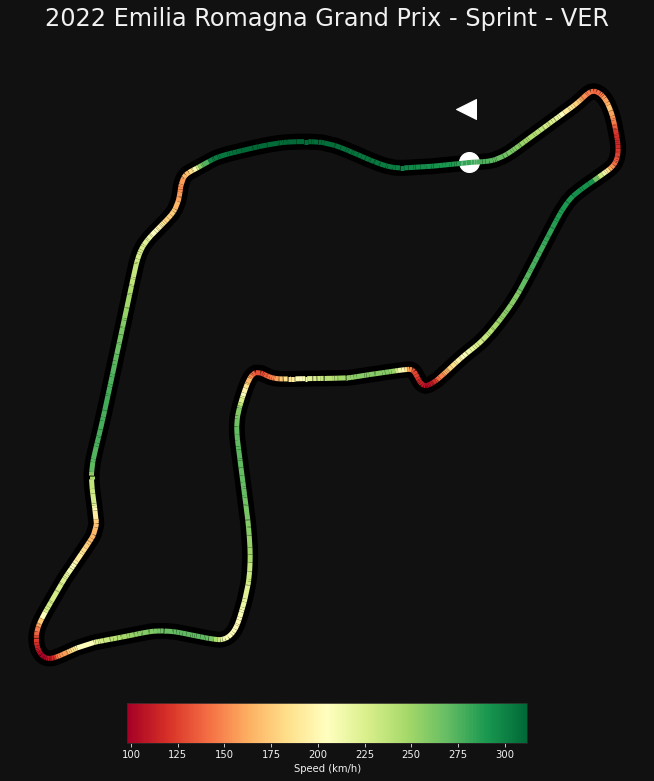

In [293]:
# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*px, 800*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(lap_1['Speed'].min(), lap_1['Speed'].max())
lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(lap_1['Speed'])

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=lap_1['Speed'].min(), vmax=lap_1['Speed'].max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label='Speed (km/h)')

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

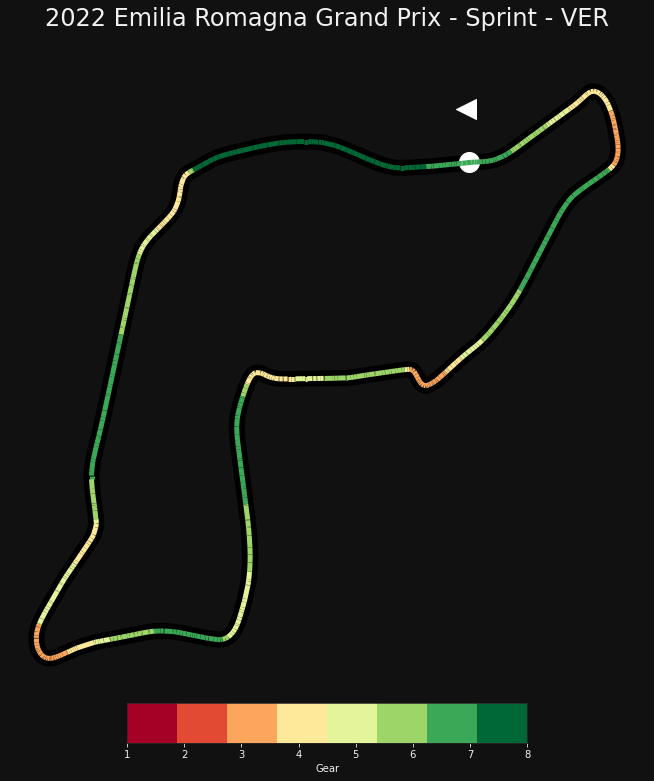

In [294]:
# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*px, 800*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a norm to map from data points to colors
norm = plt.Normalize(1, colormap_gear.N+1)
lc = LineCollection(segments, cmap=colormap_gear, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(lap_1['nGear'].to_numpy().astype(float))

# Merge all line segments together
line = ax.add_collection(lc)

# Create a color bar as a legend
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=1, vmax=8)
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_gear, orientation="horizontal", label='Gear')

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

In [295]:
def delta_bounds(vmin, vmax):
    if abs(vmin) < abs(vmax):
        vmin = -(vmax)
    else:
        vmax = -(vmin)
    return vmin, vmax

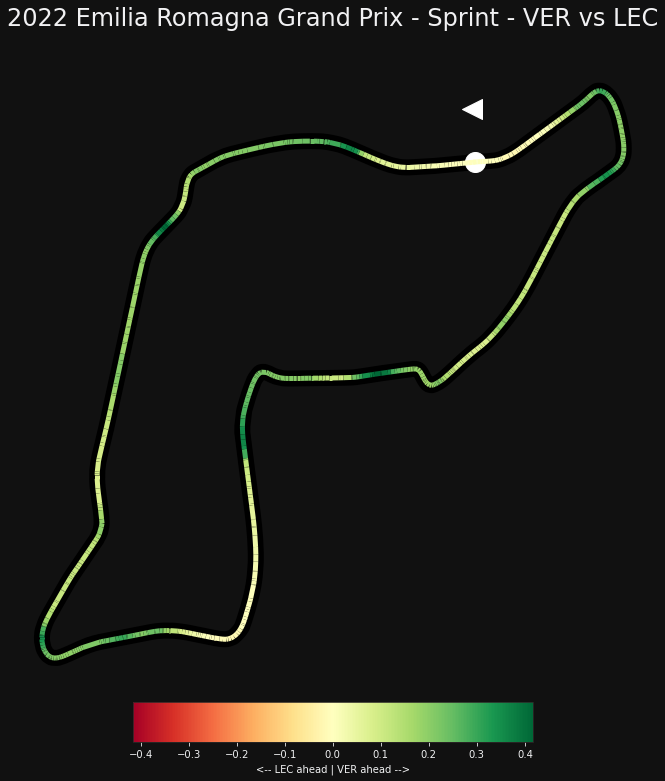

In [296]:
# Determine boundaries for the colorbar
vmin, vmax = delta_bounds(delta_time.min(), delta_time.max())

# Setup plot
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(800*px, 800*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_2['X'], lap_2['Y'], color='black', linestyle='-', linewidth=16, zorder=1)

# Add start line marker
plt.scatter(start_x, start_y, color='white', s=400, zorder=1)
plt.scatter(direction_x, direction_y, color='white', s=400, zorder=1, marker=direction_marker)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(vmin, vmax)
lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(delta_time)

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label=f"<-- {driver_2} ahead | {driver_1} ahead -->")

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

In [297]:
race = session.laps
race.info()

<class 'fastf1.core.Laps'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                400 non-null    timedelta64[ns]
 1   DriverNumber        400 non-null    object         
 2   LapTime             380 non-null    timedelta64[ns]
 3   LapNumber           400 non-null    float64        
 4   Stint               400 non-null    float64        
 5   PitOutTime          20 non-null     timedelta64[ns]
 6   PitInTime           1 non-null      timedelta64[ns]
 7   Sector1Time         380 non-null    timedelta64[ns]
 8   Sector2Time         399 non-null    timedelta64[ns]
 9   Sector3Time         399 non-null    timedelta64[ns]
 10  Sector1SessionTime  380 non-null    timedelta64[ns]
 11  Sector2SessionTime  399 non-null    timedelta64[ns]
 12  Sector3SessionTime  399 non-null    timedelta64[ns]
 13  SpeedI1             342 non-null    float64   

In [298]:
race = race.sort_values('Time').reset_index(drop=True)
race

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:03:38.464000,24,NaT,0.0,1.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,False,SOFT,1.0,True,0 days 01:02:06.774000,Alfa Romeo,ZHO,24,False,2022-04-23 14:33:06.787
1,0 days 01:03:38.464000,16,NaT,1.0,1.0,0 days 00:30:38.117000,NaT,NaT,0 days 00:00:27.716000,0 days 00:00:35.674000,NaT,0 days 01:03:02.841000,0 days 01:03:38.546000,215.0,253.0,236.0,115.0,False,SOFT,1.0,True,0 days 01:02:06.774000,Ferrari,LEC,24,False,2022-04-23 14:33:06.787
2,0 days 01:03:41.561000,1,NaT,1.0,1.0,0 days 00:29:03.418000,NaT,NaT,0 days 00:00:27.840000,0 days 00:00:37.947000,NaT,0 days 01:03:03.663000,0 days 01:03:41.625000,216.0,256.0,241.0,69.0,False,SOFT,1.0,True,0 days 01:02:06.774000,Red Bull Racing,VER,24,False,2022-04-23 14:33:06.787
3,0 days 01:03:45.122000,4,NaT,1.0,1.0,0 days 00:29:16.584000,NaT,NaT,0 days 00:00:28.355000,0 days 00:00:40.535000,NaT,0 days 01:03:04.609000,0 days 01:03:45.196000,213.0,250.0,241.0,87.0,False,SOFT,1.0,True,0 days 01:02:06.774000,McLaren,NOR,24,False,2022-04-23 14:33:06.787
4,0 days 01:03:46.604000,20,NaT,1.0,1.0,0 days 00:32:54.315000,NaT,NaT,0 days 00:00:28.332000,0 days 00:00:40.739000,NaT,0 days 01:03:05.903000,0 days 01:03:46.644000,209.0,247.0,262.0,164.0,False,MEDIUM,1.0,True,0 days 01:02:06.774000,Haas F1 Team,MAG,24,False,2022-04-23 14:33:06.787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0 days 01:33:29.560000,18,0 days 00:01:22.474000,21.0,1.0,NaT,NaT,0 days 00:00:26.054000,0 days 00:00:28.460000,0 days 00:00:27.960000,0 days 01:32:33.140000,0 days 01:33:01.600000,0 days 01:33:29.560000,212.0,252.0,281.0,296.0,False,SOFT,23.0,False,0 days 01:32:07.086000,Aston Martin,STR,1,True,2022-04-23 15:03:07.099
396,0 days 01:33:30.127000,31,0 days 00:01:22.399000,21.0,1.0,NaT,NaT,0 days 00:00:25.843000,0 days 00:00:28.656000,0 days 00:00:27.900000,0 days 01:32:33.571000,0 days 01:33:02.227000,0 days 01:33:30.127000,215.0,253.0,284.0,294.0,False,SOFT,21.0,True,0 days 01:32:07.728000,Alpine,OCO,1,True,2022-04-23 15:03:07.741
397,0 days 01:33:30.366000,10,0 days 00:01:22.314000,21.0,2.0,NaT,NaT,0 days 00:00:25.952000,0 days 00:00:28.653000,0 days 00:00:27.709000,0 days 01:32:34.004000,0 days 01:33:02.657000,0 days 01:33:30.366000,NaN,258.0,288.0,298.0,False,SOFT,20.0,True,0 days 01:32:08.052000,AlphaTauri,GAS,1,True,2022-04-23 15:03:08.065
398,0 days 01:33:35.474000,23,0 days 00:01:22.647000,21.0,1.0,NaT,NaT,0 days 00:00:26.222000,0 days 00:00:28.743000,0 days 00:00:27.682000,0 days 01:32:39.049000,0 days 01:33:07.792000,0 days 01:33:35.474000,215.0,259.0,280.0,297.0,False,SOFT,21.0,True,0 days 01:32:12.827000,Williams,ALB,1,True,2022-04-23 15:03:12.840


In [299]:
results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,1.0,NaT,NaT,NaT,0 days 00:30:39.567000,Finished,8.0
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,2.0,2.0,NaT,NaT,NaT,0 days 00:30:42.542000,Finished,7.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,3.0,7.0,NaT,NaT,NaT,0 days 00:30:44.288000,Finished,6.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,4.0,10.0,NaT,NaT,NaT,0 days 00:30:57.145000,Finished,5.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,5.0,3.0,NaT,NaT,NaT,0 days 00:31:04.128000,Finished,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,16.0,19.0,NaT,NaT,NaT,0 days 00:31:23.084000,Finished,0.0
10,10,P GASLY,GAS,AlphaTauri,4e7c9b,Pierre,Gasly,Pierre Gasly,17.0,17.0,NaT,NaT,NaT,0 days 00:31:23.361000,Finished,0.0
23,23,A ALBON,ALB,Williams,37bedd,Alexander,Albon,Alexander Albon,18.0,20.0,NaT,NaT,NaT,0 days 00:31:28.438000,Finished,0.0
6,6,N LATIFI,LAT,Williams,37bedd,Nicholas,Latifi,Nicholas Latifi,19.0,18.0,NaT,NaT,NaT,0 days 00:31:31.584000,Finished,0.0


# Tests

In [300]:
# Ergast API base request
def ergast_retrieve(api_endpoint: str):
    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()
    
    return response['MRData']

In [301]:
# Get drivers standings
def update_driver_standings(rounds):
    standings_dict = {}
    for i in range(1, rounds+1):
        try:
            r = ergast_retrieve(f'current/{i}/driverStandings')
            standings = r['StandingsTable']['StandingsLists'][0]['DriverStandings']
            for j in standings:
                if j['Driver']['code'] not in standings_dict:
                    if i > 1:
                        num = i - 1
                        standings_dict[j['Driver']['code']] = [0] * num
                        standings_dict[j['Driver']['code']].append(j['points'])
                    else:
                        standings_dict[j['Driver']['code']] = [j['points']]
                else:
                    if len(standings_dict[j['Driver']['code']]) < (i - 1):
                        num_missing = (i + 1) - len(standings_dict[j['Driver']['code']])
                        print(num_missing)
                        standings_dict[j['Driver']['code']] = standings_dict[j['Driver']['code']] + [0] * num_missing
                        standings_dict[j['Driver']['code']].append(j['points'])
                    else:
                        standings_dict[j['Driver']['code']].append(j['points'])
        except IndexError:
            break
    
    df_drivers = pd.DataFrame.from_dict(standings_dict, orient='index')
    df_drivers.columns = df_drivers.columns + 1
    df_drivers[df_drivers.columns] = df_drivers[df_drivers.columns].apply(pd.to_numeric)
    df_drivers.sort_values(by=df_drivers.columns[-1], ascending=False, inplace=True)
    return df_drivers

df_drivers = update_driver_standings(22)
df_drivers

,1,2,3,4,5,6,7
VER,0,25,25,59,85,110,125
LEC,26,45,71,86,104,104,116
PER,0,12,30,54,66,85,110
RUS,12,22,37,49,59,74,84
SAI,18,33,33,38,53,65,83
...,...,...,...,...,...,...,...
STR,0,0,0,1,2,2,2
ZHO,1,1,1,1,1,1,1
LAT,0,0,0,0,0,0,0
HUL,0,0,0,0,0,0,0


In [302]:
# Get constructors standings
def update_constructor_standings(rounds):
    standings_dict = {}
    for i in range(1, rounds+1):
        try:
            r = ergast_retrieve(f'current/{i}/constructorStandings')
            standings = r['StandingsTable']['StandingsLists'][0]['ConstructorStandings']
            for i in standings:
                if i['Constructor']['name'] not in standings_dict:
                    standings_dict[i['Constructor']['name']] = [i['points']]
                else:
                    standings_dict[i['Constructor']['name']].append(i['points'])
        except IndexError:
            break
        
    df_constructors = pd.DataFrame.from_dict(standings_dict, orient='index')
    df_constructors.columns = df_constructors.columns + 1
    df_constructors[df_constructors.columns] = df_constructors[df_constructors.columns].apply(pd.to_numeric)
    df_constructors.sort_values(by=df_constructors.columns[-1], ascending=False, inplace=True)
    return df_constructors

df_constructors = update_constructor_standings(22)
df_constructors

,1,2,3,4,5,6,7
Red Bull,0,37,55,113,151,195,235
Ferrari,44,78,104,124,157,169,199
Mercedes,27,38,65,77,95,120,134
McLaren,0,6,24,46,46,50,59
Alfa Romeo,9,9,13,25,31,39,41
Alpine F1 Team,8,16,22,22,26,34,40
AlphaTauri,4,8,10,16,16,17,17
Haas F1 Team,10,12,12,15,15,15,15
Aston Martin,0,0,0,5,6,6,7
Williams,0,0,1,1,3,3,3


In [303]:
round_mapping = {}

for i in events_list.itertuples():
    round_mapping[i.RoundNumber] = i.Country

df_drivers_line = df_drivers[(df_drivers.index == driver_1) | (df_drivers.index == driver_2)].transpose().reset_index().rename(columns={'index': 'Round'})
df_drivers_line['country'] = df_drivers_line['Round'].map(round_mapping)
df_drivers_line

,Round,VER,LEC,country
0,1,0,26,Bahrain
1,2,25,45,Saudi Arabia
2,3,25,71,Australia
3,4,59,86,Italy
4,5,85,104,United States
5,6,110,104,Spain
6,7,125,116,Monaco


In [305]:
def plot_compare_points():
    
    driver_1_team_color = '#' + results[results['Abbreviation'] == driver_1]['TeamColor'][0]
    driver_2_team_color = '#' + results[results['Abbreviation'] == driver_2]['TeamColor'][0]

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=df_drivers_line['country'], y=df_drivers_line[driver_1], name=driver_1, line_color=driver_1_team_color))
    fig.add_trace(go.Scatter(x=df_drivers_line['country'], y=df_drivers_line[driver_2], name=driver_2, line_color=driver_2_team_color))

    fig.update_xaxes(tickangle=45)
    fig.update_layout(width= 800, height = 600, title_text=f"Current Standings - {driver_1} vs {driver_2}", yaxis_title="Points", title_x=0.5)
    return fig

In [306]:
df_constructors.columns = df_constructors.columns.map(round_mapping)
df_constructors

,Bahrain,Saudi Arabia,Australia,Italy,United States,Spain,Monaco
Red Bull,0,37,55,113,151,195,235
Ferrari,44,78,104,124,157,169,199
Mercedes,27,38,65,77,95,120,134
McLaren,0,6,24,46,46,50,59
Alfa Romeo,9,9,13,25,31,39,41
Alpine F1 Team,8,16,22,22,26,34,40
AlphaTauri,4,8,10,16,16,17,17
Haas F1 Team,10,12,12,15,15,15,15
Aston Martin,0,0,0,5,6,6,7
Williams,0,0,1,1,3,3,3


In [311]:
def format_results_race(results, session_type):
    
    if session_type == 'R' or session_type == 'r' or session_type == 'Sprint':
        # Get the results table, convert it to a dataframe and set the numeric columns to int
        results['Name'] = results['FirstName'] + ' ' + results['LastName']
        results_formatted = pd.DataFrame(results[['Name','TeamName','Position','GridPosition','Time','Status','Points']].copy())
        results_formatted[['Points', 'Position', 'GridPosition']] = results_formatted[['Points', 'Position', 'GridPosition']].astype(int)
        
        # Compute time difference at finish
        time_difference = []
        time_1 = results_formatted['Time'][0]
        for i in results_formatted.itertuples():
            time_difference.append(i.Time - time_1)
            
        time_difference[0] = results_formatted['Time'][0]
        results_formatted['TimeDifference'] = time_difference
        
        # Format the time data as string
        time_str = []
        for i in results_formatted.itertuples():
            if i.Status == 'Finished':
                time = str(i.TimeDifference)
                time_str.append(time[8:-3])
            elif 'Lap' in i.Status:
                time_str.append(i.Status)
            else:
                time_str.append('DNF')
                
        results_formatted['TimeStr'] = time_str
        
        # Format the time data correctly
        time_str_2 = []
        for i in results_formatted.itertuples():
            if i.Position == 1 or len(i.TimeStr) != 11:
                time_str_2.append(i.TimeStr)
            elif len(i.TimeStr) == 11:
                time_subbed = '+' + i.TimeStr[3:]
                time_str_2.append(time_subbed)
                
        results_formatted['TimeFinish'] = time_str_2
        
        # Drop unnecessary columns
        results_formatted.drop(columns=['Status', 'Time', 'TimeStr', 'TimeDifference'], inplace=True)
        
    elif session_type == 'Q' or session_type == 'q':
        results_formatted = pd.DataFrame(results.copy())
        temp_q1 = format_time(results['Q1'], 11)
        results_formatted['Q1_time'] = temp_q1
        temp_q2 = format_time(results['Q2'], 11)
        results_formatted['Q2_time'] = temp_q2
        temp_q3 = format_time(results['Q3'], 11)
        results_formatted['Q3_time'] = temp_q3
        results_formatted = results_formatted[['Name','TeamName','Position','Q1_time','Q2_time','Q3_time']]
        results_formatted['Position'] = results_formatted['Position'].astype(int)
            
    return results_formatted  
    

In [312]:
format_results_race(session.results, ses).head(10)

,Name,TeamName,Position,GridPosition,Points,TimeFinish
1,Max Verstappen,Red Bull Racing,1,1,8,0:30:39.567
16,Charles Leclerc,Ferrari,2,2,7,+0:02.975
11,Sergio Perez,Red Bull Racing,3,7,6,+0:04.721
55,Carlos Sainz,Ferrari,4,10,5,+0:17.578
4,Lando Norris,McLaren,5,3,4,+0:24.561
3,Daniel Ricciardo,McLaren,6,6,3,+0:27.740
77,Valtteri Bottas,Alfa Romeo,7,8,2,+0:28.133
20,Kevin Magnussen,Haas F1 Team,8,4,1,+0:30.712
14,Fernando Alonso,Alpine,9,5,0,+0:32.278
47,Mick Schumacher,Haas F1 Team,10,12,0,+0:33.773


In [313]:
format_results_race(session.results, ses).tail(10)

,Name,TeamName,Position,GridPosition,Points,TimeFinish
63,George Russell,Mercedes,11,11,0,+0:36.284
22,Yuki Tsunoda,AlphaTauri,12,16,0,+0:38.298
5,Sebastian Vettel,Aston Martin,13,9,0,+0:40.177
44,Lewis Hamilton,Mercedes,14,13,0,+0:41.459
18,Lance Stroll,Aston Martin,15,15,0,+0:42.910
31,Esteban Ocon,Alpine,16,19,0,+0:43.517
10,Pierre Gasly,AlphaTauri,17,17,0,+0:43.794
23,Alexander Albon,Williams,18,20,0,+0:48.871
6,Nicholas Latifi,Williams,19,18,0,+0:52.017
24,Guanyu Zhou,Alfa Romeo,20,0,0,DNF
